In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt
import math
import statistics

In [2]:
with open('logins.json') as filename:
    logins = json.load(filename)

In [3]:
logins.keys()

dict_keys(['login_time'])

In [4]:
#only contains timestamps

In [5]:
log_time = logins['login_time']

In [6]:
print(len(log_time))
print(max(log_time))
print(min(log_time))

93142
1970-04-13 18:57:38
1970-01-01 20:12:16


In [7]:
#dataset contains 93 thousand logins between new years 1970 and 4/13/1970.

In [8]:
#First: Group into 15-minute intervals

In [9]:
#key variables
login_format = '%Y-%m-%d %H:%M:%S'
zero_time = dt.datetime.strptime('1970-01-01 00:01:01', login_format)
fifteen_minutes = dt.timedelta(seconds = (60*15))

In [10]:
#Create dictionary of results, more efficient than a list
def minute_agg(times):
    login_agg = {}
    for time in times:
        time_object = dt.datetime.strptime(time, login_format)
        #timedelta starts seconds
        time_difference = time_object - zero_time
        time_minutes = math.floor(time_difference/fifteen_minutes)
        if time_minutes not in login_agg:
            login_agg[time_minutes] = 1
        else:
            login_agg[time_minutes] += 1
    return login_agg

In [11]:
#Test with toy sequence

In [12]:
a = '1970-01-01 00:05:01'
b = '1970-01-01 00:10:01'
c = '1970-01-01 00:15:01'
d = '1970-01-01 00:20:01'
e = '1970-01-01 00:25:01'
f = '1970-01-01 00:30:01'
g = '1970-01-01 00:35:01'
test = [a, b, c, d, e, f, g]

In [13]:
result = minute_agg(test)

In [14]:
result

{0: 3, 1: 3, 2: 1}

In [15]:
#Run on full dataset and monitor time taken
#We may need to find something more efficient if this runs long
starttime = dt.datetime.now()
login_fifteen = minute_agg(log_time)
print('data prepared in', dt.datetime.now()-starttime)

data prepared in 0:00:01.632474


In [16]:
#Workable for multiple orders of magnitude more data. Good. Data cleaning workable for now,
#let's look at the data.

<BarContainer object of 9388 artists>

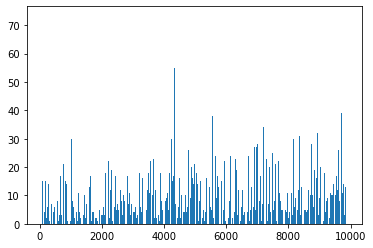

In [17]:
plt.bar(login_fifteen.keys(), login_fifteen.values())

In [18]:
statistics.mean(login_fifteen[l] for l in login_fifteen)

9.92138900724329

In [19]:
#Basic view is too low-resolution. We can see that average demand is 9, but we need to zoom in.

Text(0, 0.5, 'logins')

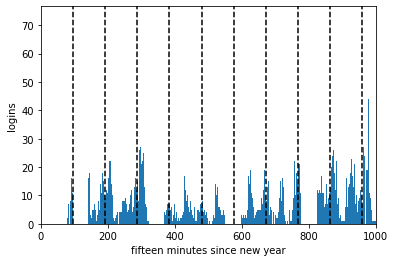

In [20]:
plot = plt.bar(login_fifteen.keys(), login_fifteen.values())
plt.xlim(0, 1000)
#Add reference lines every 24 hours = add them every 96 intervals
for x in range(math.floor(1000/(96))):
    plt.axvline((x+1)*96, c = 'black', ls='--')
plt.xlabel('fifteen minutes since new year')
plt.ylabel('logins')

Text(0, 0.5, 'logins')

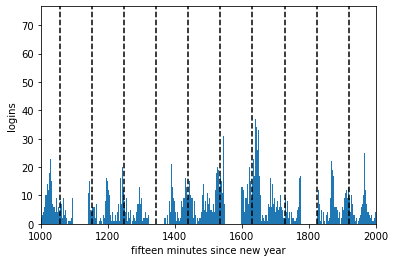

In [21]:
plot = plt.bar(login_fifteen.keys(), login_fifteen.values())
plt.xlim(1000, 2000)
#Add reference lines every 24 hours = add them every 96 intervals
for x in range(math.floor(2000/(96))):
    plt.axvline((x+1)*96, c = 'black', ls='--')
plt.xlabel('fifteen minutes since new year')
plt.ylabel('logins')

In [22]:
#Looks like we see spikes around midday and in the evenings. Let's refine this.
#First, verify data is clean.

In [23]:
log_time[0]

'1970-01-01 20:13:18'

In [24]:
#0:4 gives the year, 5:7 the month, 8:10 the day. 
#11:13 gives us the hour, 14:16 the minute, 17:19 the second
years = []
months = []
days = []
hours = []
minutes = []
seconds = []
for time in log_time:
    years.append(int(time[0:4]))
    months.append(int(time[5:7]))
    days.append(int(time[8:10]))
    hours.append(int(time[11:13]))
    minutes.append(int(time[14:16]))
    seconds.append(int(time[17:19]))

In [25]:
for y in years:
    assert y == 1970
for h in hours:
    assert h < 24
    assert h >= 0
for m in minutes:
    assert m < 60
    assert m >= 0
for s in seconds:
    assert s < 60
    assert s >= 0

In [26]:
#not a leap year
for m, d in zip(months, days):
    assert m in [1, 2, 3, 4]
    assert d > 0
    if m == 4:
        assert d <= 30
    elif m == 2:
        assert d <= 28
    else:
        assert d <= 31

In [27]:
#No entry errors observed. Dates check out.

In [28]:
fifteen_average = {}
for x in range(96):
    fifteen_average[x] = []

In [29]:
for x in range(len(login_fifteen)):
    if x in login_fifteen:
        fifteen_average[x%96].append(login_fifteen[x])

In [30]:
fifteen_data = {}
for x in range(96):
    fifteen_data[x/4] = np.mean(fifteen_average[x])

Text(0, 0.5, 'average logins')

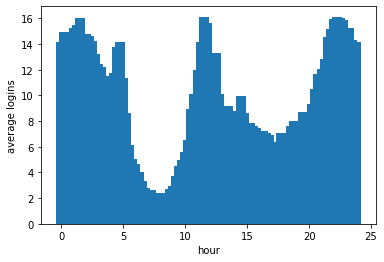

In [31]:
plt.bar(fifteen_data.keys(), fifteen_data.values())
plt.xlabel('hour')
plt.ylabel('average logins')

In [32]:
#Demand hits a short peak around 11, and a longer peak from about 22:00 though 02:00, with a
#secondary peak at about 04:00. Logins hit their lowest point from 06:00-09:00.

In [33]:
#Data verified to be clean
#Timestamps aggreggated by 15-minute intervals
#Data visualized, described
#Observed daily cycles